In [1]:
%reset-f
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np

import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

from res_ind_lib import *


from fancy_plots import *
import os, time


In [3]:
import pandas as pd

plt.rcParams["savefig.dpi"]=80
plt.rcParams["savefig.directory"]="img/"
plt.rcParams["legend.fancybox"]=True

os.makedirs("img",exist_ok=True)

font = {'family' : 'serif',
    'weight' : 'normal',
    'size'   : 15}

plt.rc('font', **font)

# data, options, functions

In [4]:
economy = "country"

In [5]:
df=pd.read_csv("results/results.csv", index_col=economy).dropna()

hop=pd.read_csv("intermediate/cat_info.csv", index_col=[economy, "income_cat"]).unstack("income_cat").rename(
    columns={"nonpoor":"_r", "poor":"_p"})

hop.columns=[''.join(col) for col in hop.columns.values]

df[hop.columns]=hop
df.head()


,gdp_pc_pp,pop,urbanization_rate,prepare_scaleup,borrow_abi,avg_prod_k,T_rebuild_K,pi,income_elast,rho,...,gamma_SP_r,gamma_SP_p,k_r,k_p,fa_r,fa_p,v_r,v_p,shew_r,shew_p
country,,,,,,,,,,,,,,,,,,,,,
Albania,9960.94073,2897366.0,0.57407,0.00000,0.17500,0.18528,3,0.2,1.5,0.06,...,1.094243,0.623028,61811.780436,21560.668539,0.022104,0.021223,0.351500,0.7,0.00,0.00
Angola,7488.01176,21471618.0,0.44050,0.00000,0.17500,0.43240,3,0.2,1.5,0.06,...,1.160476,0.358097,20523.147061,4494.564269,0.002814,0.012449,0.600000,0.7,0.00,0.00
Argentina,18087.19626,41446246.0,0.91751,0.73333,0.37500,0.26955,3,0.2,1.5,0.06,...,1.171127,0.315492,80282.025353,14379.760092,0.008573,0.008979,0.397254,0.7,0.64,0.64
Armenia,7526.83642,2976566.0,0.62673,0.40000,0.42500,0.36670,3,0.2,1.5,0.06,...,1.043768,0.824929,24135.209063,6089.709776,0.053080,0.052914,0.237500,0.3,0.32,0.32
Australia,42834.01676,23129300.0,0.89423,0.80000,0.91667,0.27360,3,0.2,1.5,0.06,...,0.928076,1.287696,188801.470089,27572.673316,0.003927,0.004331,0.538600,0.7,0.80,0.80


In [6]:
df.ix[["Denmark", "Senegal", "Nepal", "Netherlands","Malawi", "Bangladesh","Japan","Angola", "Serbia", "Congo, Dem. Rep.", "Lao PDR"],
                           ["c_p","c_r", "risk", "v","v_p","v_r","shew","fa","risk_to_assets","resilience","social_p","social_r"]  ]

,c_p,c_r,risk,v,v_p,v_r,shew,fa,risk_to_assets,resilience,social_p,social_r
country,,,,,,,,,,,,
Denmark,19393.367366,48255.073728,0.00006,1.30000,0.3,0.250000,3.2,0.00006,0.00005,0.80836,NaN,NaN
Senegal,655.363317,2548.755680,0.00224,3.44000,0.7,0.685000,2.4,0.00061,0.00171,0.76425,NaN,NaN
Nepal,898.448827,2491.375783,0.01639,2.29506,0.7,0.398766,1.6,0.00706,0.01040,0.63411,NaN,NaN
Netherlands,18908.886111,51549.225232,0.00116,1.33903,0.3,0.259757,4.0,0.00104,0.00091,0.78153,NaN,NaN
Malawi,204.222624,892.671813,0.01692,2.46979,0.7,0.442447,3.2,0.00648,0.01008,0.59581,NaN,NaN
Bangladesh,1266.930797,3250.076976,0.03455,2.36214,0.7,0.415535,3.2,0.01763,0.02272,0.65765,NaN,NaN
Japan,13123.873243,41236.919218,0.00844,1.11975,0.3,0.204938,3.2,0.00717,0.00655,0.77550,NaN,NaN
Angola,2021.763175,8854.573906,0.00478,3.10000,0.7,0.600000,0.0,0.00154,0.00149,0.31209,NaN,NaN
Serbia,5395.509702,14766.742950,0.01939,2.46539,0.7,0.441349,1.6,0.00714,0.01387,0.71556,NaN,NaN


In [7]:
debug=False


names = df.index
tool_tips=df.index.tolist()

#marker size
mks=85

def annotated_plot(x_,y_,thousands=False,**kwargs):
    xlabel_=kwargs.get("xlabel",None)
    ylabel_=kwargs.get("ylabel",None)
    logical=kwargs.get("logical",None)
    saveto=kwargs.get("saveto",None)
    names_ = kwargs.get("names",None)
    tool_tips = kwargs.get("tool_tips",None)
    color_=kwargs.get("color","blue")
    
    enforce_zerobound =  kwargs.get("enforce_zerobound",True)
    
    same_fig=kwargs.get("same_fig",False)
    
    if not same_fig:
        fig_ = plt.figure(figsize=(7,7))
           
    sc=plt.scatter(x_,y_,color=color_,s=mks,alpha=.5,clip_on=False)
    if (logical is not None) & (~debug):
        for label, x, y in zip(names_[logical], x_[logical], y_[logical]):
            plt.annotate(
                label, 
                xy = (x, y), xytext = (10, 0),
                textcoords = 'offset points', ha = 'left', va = 'center',fontsize=13
                #bbox = nonedict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                #arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
            )
            
    if ylabel_ is not None:
        plt.ylabel(ylabel_)
    if xlabel_ is not None:
        plt.xlabel(xlabel_)        
    
    if enforce_zerobound:
        plt.xlim(xmin=0);plt.ylim(ymin=0)
    
    if saveto is not None:
        savefig("img/"+saveto)
    
    if debug:
        for label, x, y in zip(names, x_, y_):
            plt.annotate(
                label, 
                xy = (x, y), xytext = (2, 0),
                textcoords = 'offset points', ha = 'left', va = 'center',fontsize=8
                #bbox = nonedict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                #arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
            )
    
    spine_and_ticks(plt.gca(), thousands=thousands)
    
    
    
    

# macro

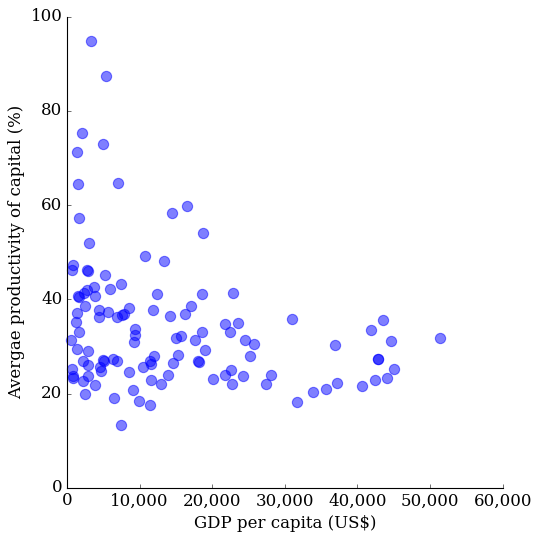

In [8]:
annotated_plot(df.gdp_pc_pp,100*df.avg_prod_k,color="blue")
plt.xlabel("GDP per capita (US$)")
x_thousands_sep()
plt.ylabel("Avergae productivity of capital (%)")
plt.xlim(xmin=0)



savefig("img/mu_vs_gdp.png",bbox_inches="tight")



# resilience, risk, protection,  exposure, 

In [9]:
# Correlation of various resilience with GDP per capita and poverty
a=df[["resilience","risk","risk_to_assets"]].dropna().corr()
a.to_excel("results/corr_resilience_expo.xlsx")
a

,resilience,risk,risk_to_assets
resilience,1.000000,-0.172295,0.000361
risk,-0.172295,1.000000,0.965507
risk_to_assets,0.000361,0.965507,1.000000


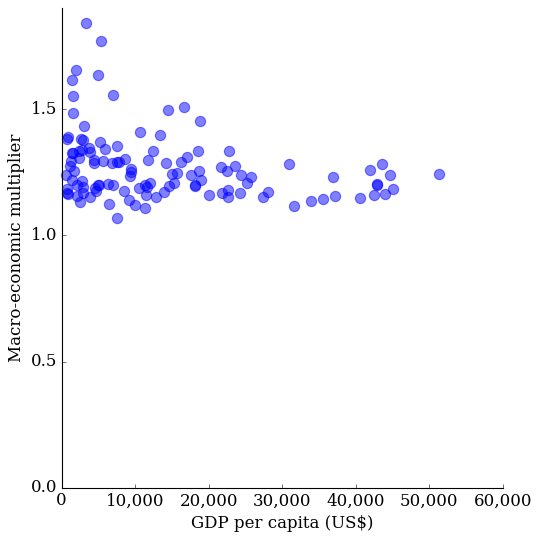

In [10]:
df_=df[["gdp_pc_pp","macro_multiplier"]].dropna()

annotated_plot(df_["gdp_pc_pp"],df_["macro_multiplier"],tool_tips=tool_tips);
plt.xlim(xmin=0)
plt.ylabel("Macro-economic multiplier")
plt.xlabel("GDP per capita (US$)")
x_thousands_sep()
# labels = df_["country"].tolist()


savefig("img/macro_multiplier.png",bbox_inches="tight")


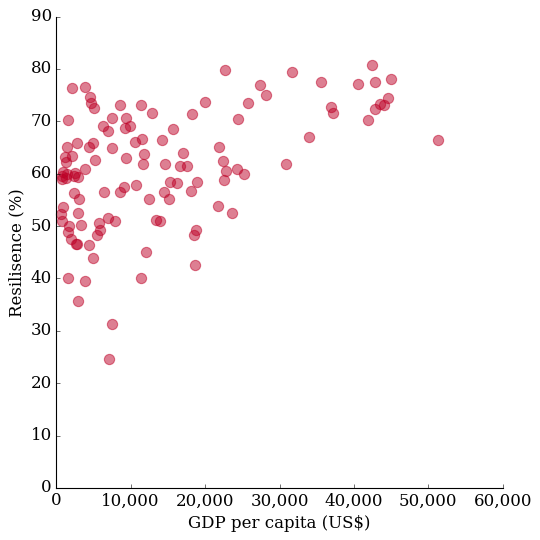

In [11]:
# Economic resilience
x=df["gdp_pc_pp"]
y=df["resilience"]*100

annotated_plot(x,y,ylabel = "Resilisence (%)", color="#bd0026", alpha=0.5);
plt.xlabel("GDP per capita (US$)")
x_thousands_sep()

savefig("img/resilience.pdf")


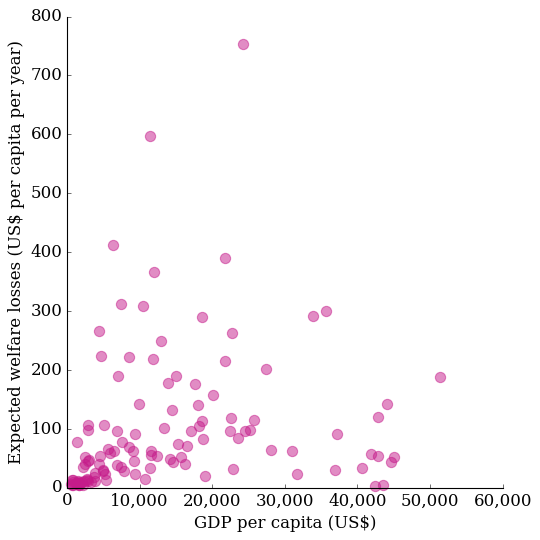

In [12]:
# Economic resilience
x=df["gdp_pc_pp"]
y=df["dWpc_currency"]

annotated_plot(x,y,ylabel = "Expected welfare losses (US$ per capita per year)", color="#c51b8a", alpha=0.5);
# plt.ylim(0,7)


plt.xlabel("GDP per capita (US$)")
x_thousands_sep()

# plt.xlim(0,2)
savefig("img/rexpected_welfare_losses_pc")


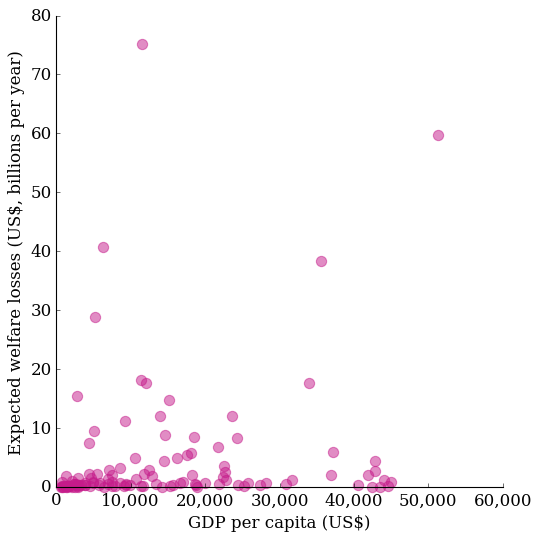

In [13]:
# Economic resilience
x=df["gdp_pc_pp"]
y=df["dWtot_currency"]*1e-9

annotated_plot(x,y,ylabel = "Expected welfare losses (US$, billions per year)", color="#c51b8a", alpha=0.5);
# plt.ylim(0,7)


plt.xlabel("GDP per capita (US$)")
x_thousands_sep()

# plt.xlim(0,2)
savefig("img/rexpected_welfare_losses")


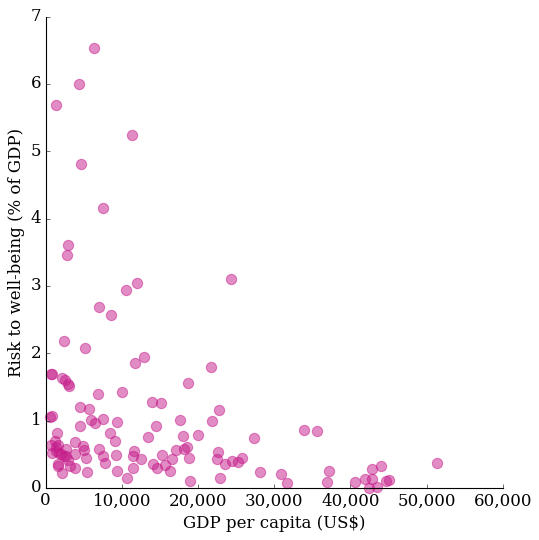

In [14]:
# Economic resilience
x=df["gdp_pc_pp"]
y=df["risk"]*100

annotated_plot(x,y,ylabel = "Risk to well-being (% of GDP)", color="#c51b8a", alpha=0.5);
plt.ylim(0,7)


plt.xlabel("GDP per capita (US$)")
x_thousands_sep()

# plt.xlim(0,2)
savefig("img/risk_to_welfare.pdf")


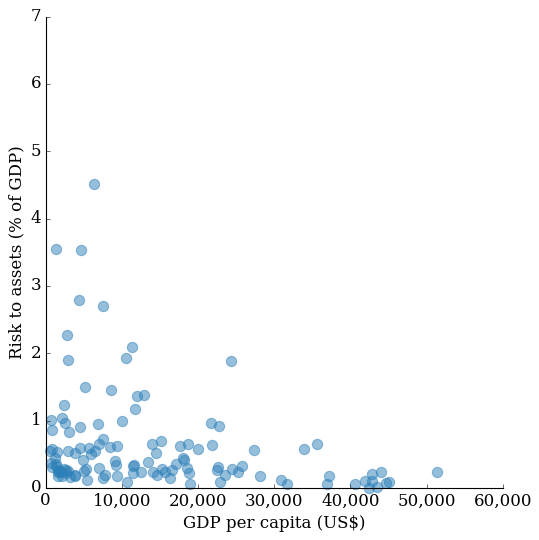

In [15]:
#ASSETS
x=df["gdp_pc_pp"]
y=df["risk_to_assets"]*100

annotated_plot(x,y,ylabel = "Risk to assets (% of GDP)", color="#2c7fb8", alpha=0.5);
plt.xlabel("GDP per capita (US$)")
x_thousands_sep()
plt.ylim(0,7)

savefig("img/risk_to_assets.pdf")


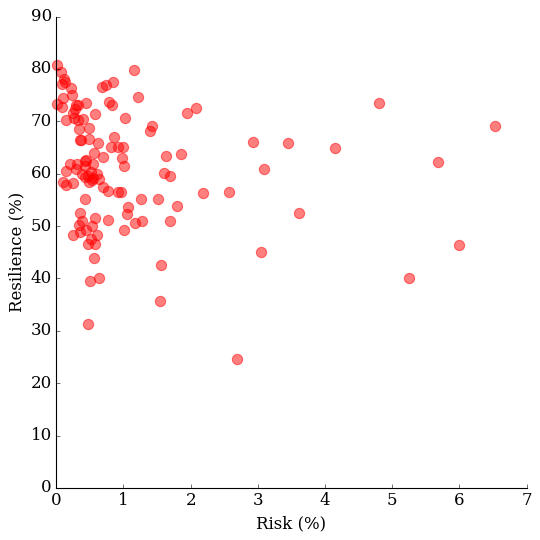

In [16]:
annotated_plot(100*df.risk,100*df.resilience,color="red", thousands = False)
plt.ylabel("Resilience (%)")
plt.xlabel("Risk (%)")
plt.xlim(xmin=0)

savefig("img/risk_vs_resi.png",bbox_inches="tight")


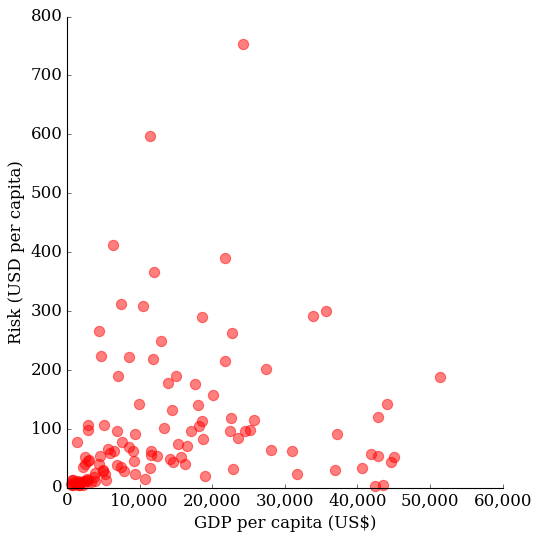

In [17]:
annotated_plot(df["gdp_pc_pp"],df.dWpc_currency,color="red")
plt.xlabel("GDP per capita (US$)")
plt.ylabel("Risk (USD per capita)")
plt.xlim(xmin=0)

x_thousands_sep()

savefig("img/risk_level_vs_gdp.png",bbox_inches="tight")

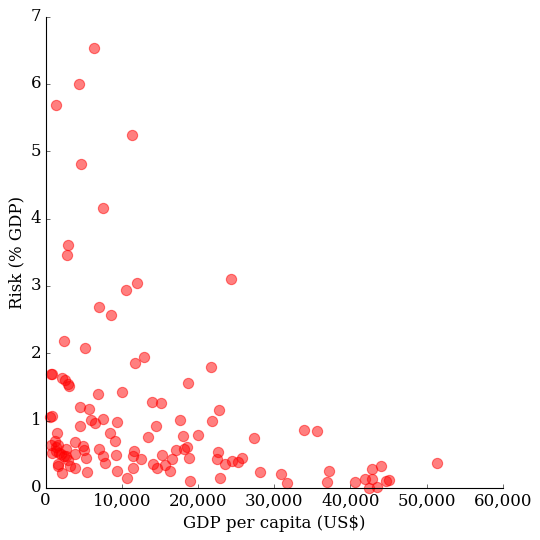

In [18]:
annotated_plot(df["gdp_pc_pp"],100*df["risk"],color="red", thousands=False)
plt.xlabel("GDP per capita (US$)")
plt.ylabel("Risk (% GDP)")

plt.xlim(xmin=0)
x_thousands_sep()
# plt.ylim(ymax=3)

savefig("img/risk_vs_gdp_trunc.png",bbox_inches="tight")

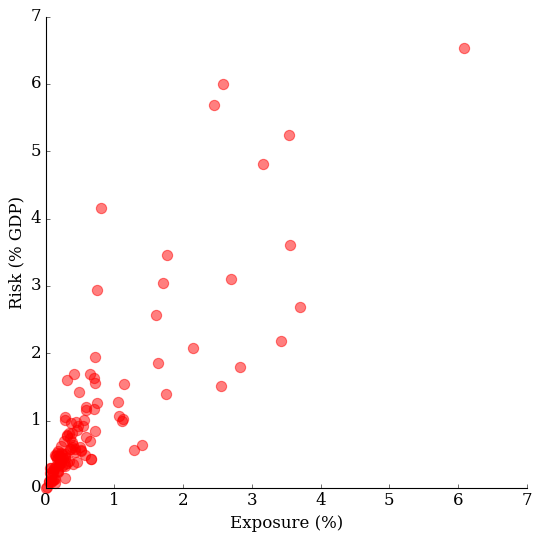

In [19]:
annotated_plot(df["fa"]*100,100*df["risk"],color="red")
plt.xlabel("Exposure (%)")
plt.ylabel("Risk (% GDP)")
plt.xlim(xmin=0)

savefig("img/risk_depends_exposure.png",bbox_inches="tight")

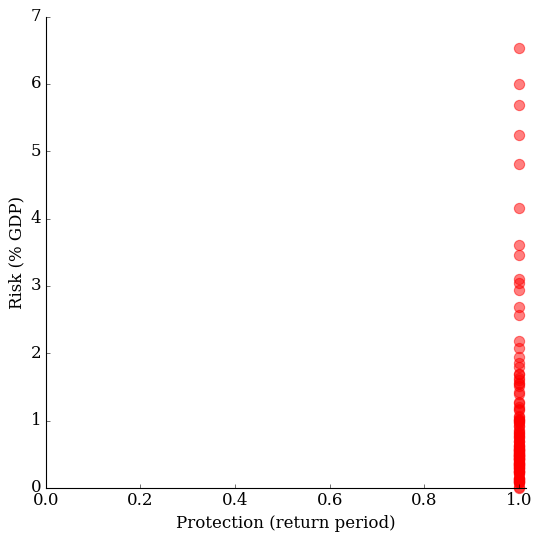

In [20]:
annotated_plot(df["protection"],100*df["risk"],color="red")
plt.xlabel("Protection (return period)")
plt.ylabel("Risk (% GDP)")
plt.xlim(xmin=0)

savefig("img/risk_depends_protection.png",bbox_inches="tight")

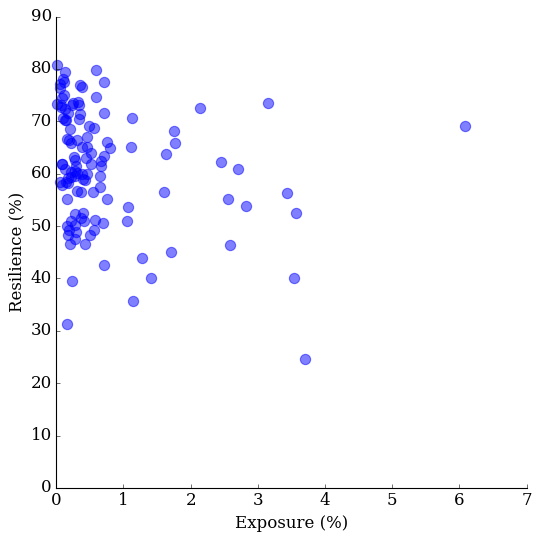

In [21]:
annotated_plot(df["fa"]*100,100*df["resilience"])
plt.xlabel("Exposure (%)")
plt.ylabel("Resilience (%)")
plt.xlim(xmin=0)

savefig("img/resilient_vs_expo.png",bbox_inches="tight")

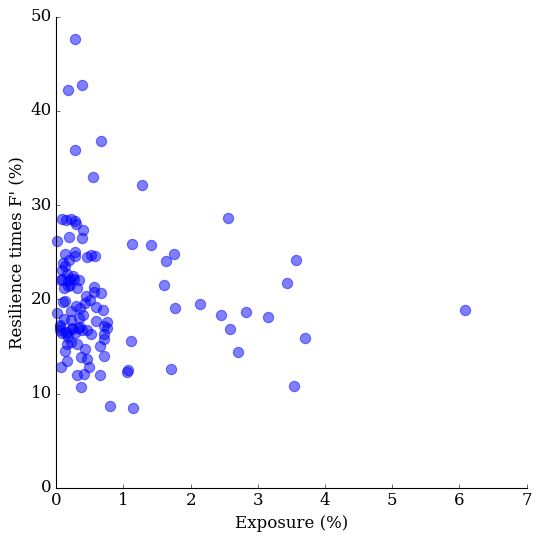

In [22]:
annotated_plot(df["fa"]*100,100*df["resilience"]*df.avg_prod_k)
plt.xlabel("Exposure (%)")
plt.ylabel("Resilience times F' (%)")
plt.xlim(xmin=0)

savefig("img/resilient_vs_expo__.png",bbox_inches="tight")

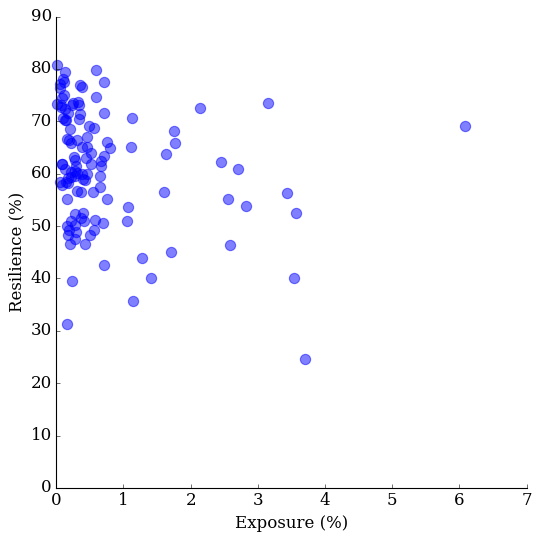

In [23]:
annotated_plot(df["fa"]*100,100*df["resilience"])
plt.xlabel("Exposure (%)")
plt.ylabel("Resilience (%)")
plt.xlim(xmin=0)

savefig("img/resilient_vs_expo.png",bbox_inches="tight")

# eta impact

In [24]:
if False:
    df_s=df.append(pd.read_csv("results/df_sensit_results.csv"))
    countries1   = ["eta=1" in c for c in df_s.country]
    countries15 = ["$" not in c for c in df_s.country]
    countries2   = ["eta=2" in c for c in df_s.country]
    #annotated_plot(df_s.ix[countries15,"gdp_pc_pp"],df_s.ix[countries15,"resilience"]*100,color="blue")
    annotated_plot(df_s.ix[countries1,"gdp_pc_pp"],df_s.ix[countries1,"resilience"]*100,color="red")
    annotated_plot(df_s.ix[countries15,"gdp_pc_pp"],df_s.ix[countries15,"resilience"]*100,color="blue",same_fig=True)
    annotated_plot(df_s.ix[countries2,"gdp_pc_pp"],df_s.ix[countries2,"resilience"]*100,color="green",same_fig=True)
    plt.xlabel("GDP per capita")
    plt.ylabel("Resilience (%)")
    plt.xlim(xmin=0)

    plt.legend(["$\eta=1$","$\eta=1.5$","$\eta=2$"],loc="lower right")
    # This should be called after all axes have been added
    #plt.tight_layout()
    savefig("img/resilience_eta.png",bbox_inches="tight")

In [25]:
if  False:
    annotated_plot(df_s.ix[countries1,"share1"]*100,df_s.ix[countries1,"resilience"]*100,color="red")
    annotated_plot(df_s.ix[countries15,"share1"]*100,df_s.ix[countries15,"resilience"]*100,color="blue",same_fig=True)
    annotated_plot(df_s.ix[countries2,"share1"]*100,df_s.ix[countries2,"resilience"]*100,color="green",same_fig=True)
    plt.xlabel("Income share of bottom quintile (%)")
    plt.ylabel("Resilience (%)")
    plt.xlim(xmin=0)

    plt.legend(["$\eta=1$","$\eta=1.5$","$\eta=2$"],loc="upper left")

    result = sm.ols(formula="resilience ~ share1", data=df_s.ix[countries15]).fit()
    exp15=result.params.Intercept+result.params.share1*df_s.ix[countries15,"share1"]
    plt.plot(df_s.ix[countries15,"share1"]*100,exp15*100)
    print(result.params.share1)


    result = sm.ols(formula="resilience ~ share1", data=df_s.ix[countries2]).fit()
    exp2=result.params.Intercept+result.params.share1*df_s.ix[countries2,"share1"]
    plt.plot(df_s.ix[countries2,"share1"]*100,exp2*100)
    print(result.params.share1)

    result = sm.ols(formula="resilience ~ share1", data=df_s.ix[countries1]).fit()
    exp1=result.params.Intercept+result.params.share1*df_s.ix[countries1,"share1"]
    plt.plot(df_s.ix[countries1,"share1"]*100,exp1*100)
    print(result.params.share1)


    savefig("img/resilience_eta_share1.png",bbox_inches="tight")

# Welfare function

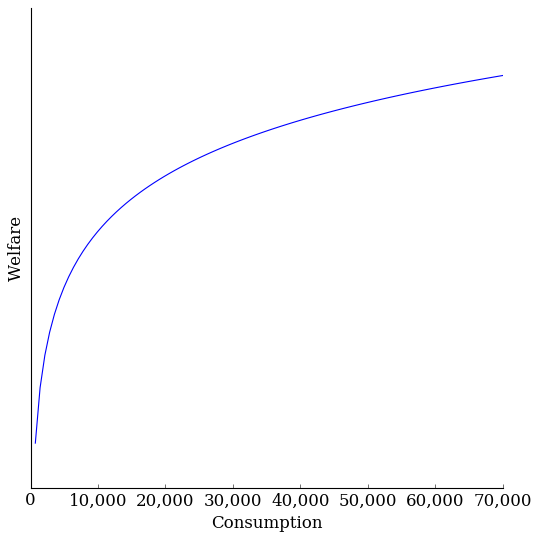

In [26]:
x=np.linspace(0,70000,100);
plt.figure(figsize=(7,7))

plt.plot(x,np.log(x))
plt.ylabel("Welfare")
plt.xlabel("Consumption");
plt.yticks([])
plt.xlim(xmin=0)

x_thousands_sep()

spine_and_ticks(plt.gca())

savefig("img/welfare_function",bbox_inches="tight")

# Income distribution

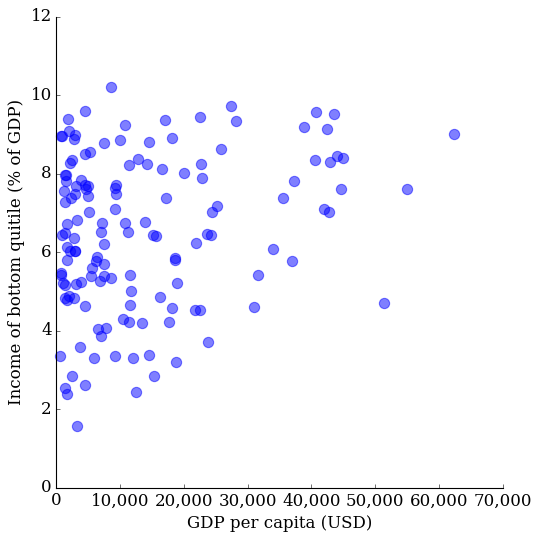

In [27]:
hop=pd.read_csv("inputs/wb_data_backup.csv", index_col="country")
x=hop.gdp_pc_pp
y=hop.share1*100


annotated_plot(x,y,xlabel = "GDP per capita (USD)",ylabel = "Income of bottom quitile (% of GDP)");

x_thousands_sep()

savefig("img/share1")


# Scale up

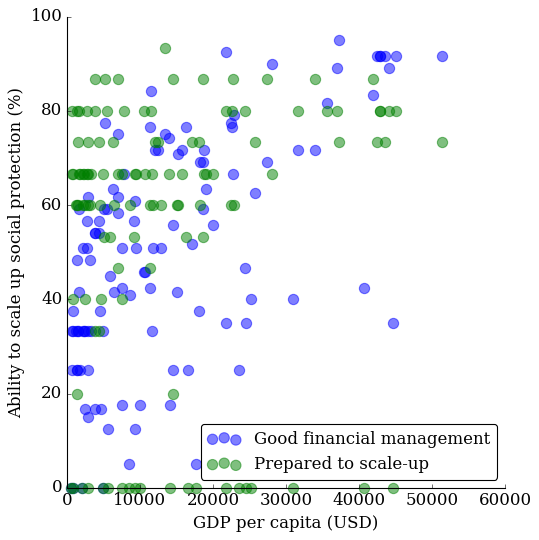

In [28]:

x=df["gdp_pc_pp"]
y=(100*df["borrow_abi"]+df["prepare_scaleup"])/2
#plt.plot(x,100*df["borrow_abi"],color='blue',marker='.',markeredgewidth=1,linestyle='None',markersize=mks,clip_on=False)

df_ = df[["gdp_pc_pp","borrow_abi","prepare_scaleup"]].dropna()

annotated_plot(df_["gdp_pc_pp"],100*df_["borrow_abi"],xlabel = "GDP per capita (USD)",ylabel = "Ability to scale up social protection (%)");

plt.legend(["Good financial management","Prepared to scale-up"],prop=font)
savefig("img/ability_to_borrow")

annotated_plot(df_["gdp_pc_pp"],100*df_["prepare_scaleup"],color="green",same_fig=True);
#annotated_plot(df_["gdp_pc_pp"],50*(df_["prepare_scaleup"]+df_["borrow_abi"]),color="green",same_fig=True);
plt.ylim(ymax=100)

#plt.legend(["Ability to borrow","Prepared to scale-up","Total"],prop=font)
plt.legend(["Good financial management","Prepared to scale-up"],prop=font,loc="lower right")

savefig("img/ability_to_scale_up",bbox_inches="tight")

# Vulnerability, expsure, protection

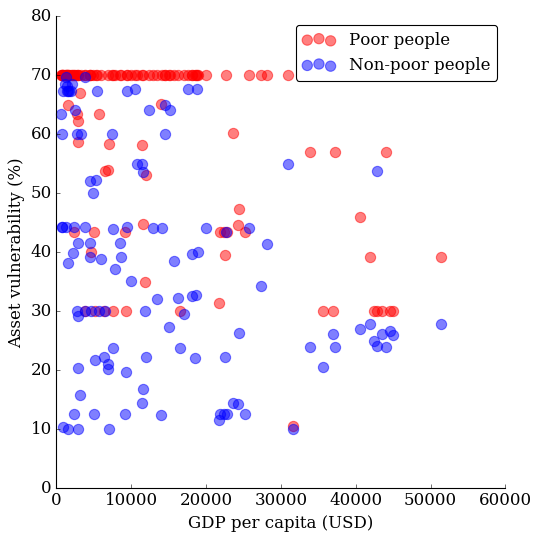

In [29]:
x=df["gdp_pc_pp"]
y=100*df["v_p"]
y_r=100*df["v_r"]

annotated_plot(x,y,color="red");
annotated_plot(x,y_r,color="blue",same_fig=True);
plt.xlim(xmin=0);plt.ylim(ymin=0)
plt.xlabel("GDP per capita (USD)")
plt.legend(["Poor people","Non-poor people"],prop=font,loc="upper right")
plt.ylabel("Asset vulnerability (%)")

savefig("img/vulnerability.png",bbox_inches="tight")  


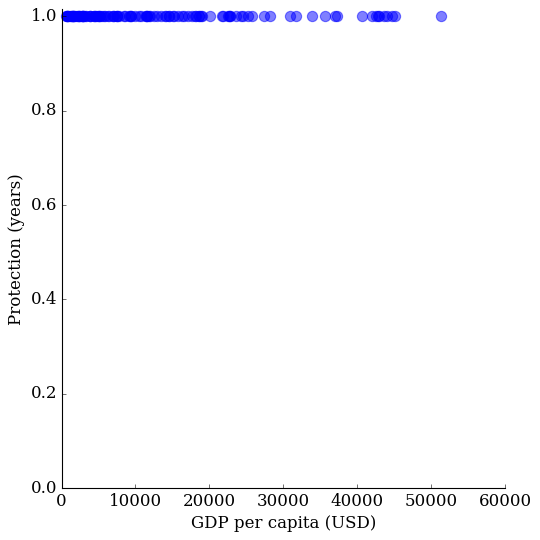

In [30]:

df_ = df.query("protection<200")

x=df_["gdp_pc_pp"]
y=df_["protection"]

annotated_plot(x,y,color="blue");
plt.xlim(xmin=0);plt.ylim(ymin=0)
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Protection (years)")


savefig("img/protection.png",bbox_inches="tight")  



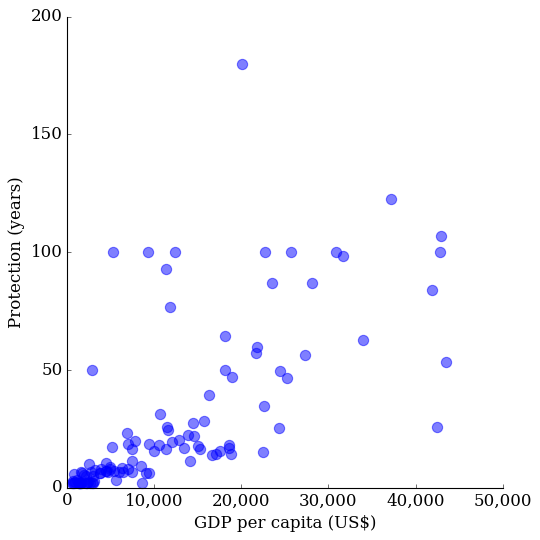

In [31]:
minrp = 2
df_ = df

df_["protection_FLOPROS"]= pd.read_csv("inputs/protection_national_from_flopros.csv", index_col="country", squeeze=True 
                                 ).clip(lower=minrp)


df_ = df_.query("protection_FLOPROS<200")

x=df_["gdp_pc_pp"]
y=df_["protection_FLOPROS"]

annotated_plot(x,y,color="blue");

plt.xlim(xmin=0);plt.ylim(ymin=0)
plt.xlabel("GDP per capita (US$)")
plt.ylabel("Protection (years)")

x_thousands_sep()

savefig("img/protection_flopros")  

df_.ix["Bangladesh"];

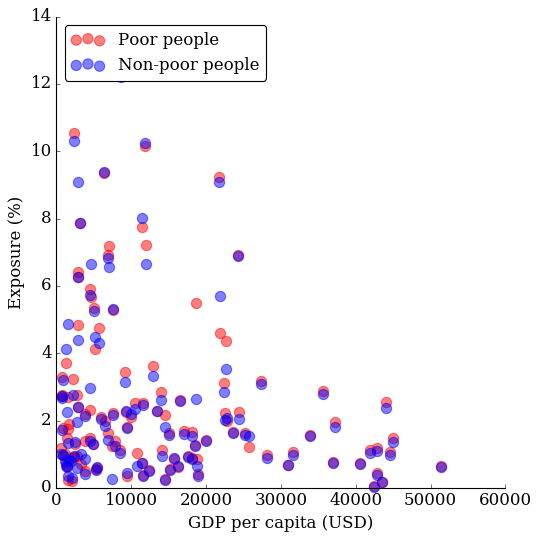

In [32]:
x=df["gdp_pc_pp"]
y=100*df["fa_p"]
y_r=100*df["fa_r"]

annotated_plot(x,y,color="red");
annotated_plot(x,y_r,color="blue",same_fig=True);
plt.xlim(xmin=0);plt.ylim(ymin=0)
plt.xlabel("GDP per capita (USD)")
plt.legend(["Poor people","Non-poor people"],prop=font,loc="upper left")
plt.ylabel("Exposure (%)")

savefig("img/exposure.png",bbox_inches="tight")  

# Mumbai

In [33]:
H_mumbai=0.68
H_avg=0.53

#  Regressions

In [34]:
result = sm.ols(formula="resilience ~ gdp_pc_pp", data=df).fit()
df["expected_resilience"]=result.params.Intercept+result.params.gdp_pc_pp*df["gdp_pc_pp"]
df["resilience_anomaly"]=df["resilience"]-df["expected_resilience"]
a=result.summary()
f = open('results/regression.csv', 'w')
f.write(a.as_csv())
f.close()
a

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             resilience   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     34.30
Date:                Sat, 17 Sep 2016   Prob (F-statistic):           4.58e-08
Time:                        10:49:10   Log-Likelihood:                 106.57
No. Observations:                 117   AIC:                            -209.1
Df Residuals:                     115   BIC:                            -203.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.5525      0.013     41.089      0.000         0.526     0.579
gdp_pc_pp   4.144e-06   7.08e-07      5.856      0.000      2.74e-06  5.55e-06
==============================================================================
Omnibus:                        7.288   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                6.858
Skew:                          -0.531   Prob(JB):                       0.0324
Kurtosis:                       3.530   Cond. No.                     2.82e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

KeyError: 'country'

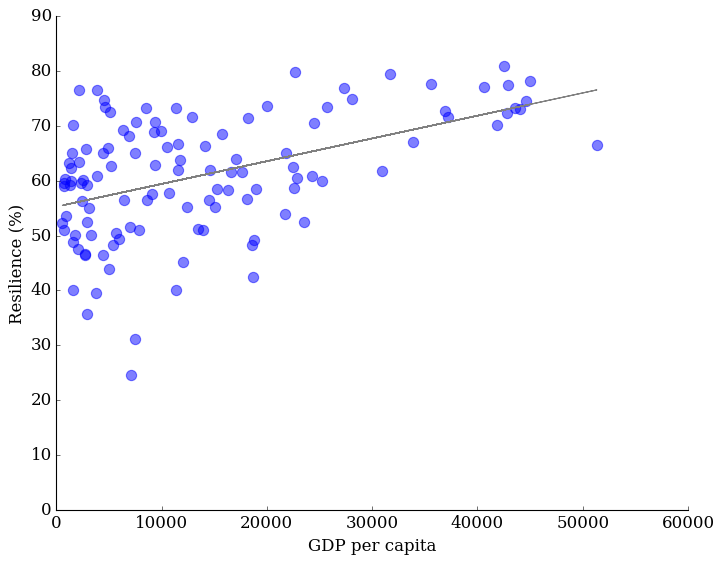

In [35]:
plt.rc('font', **font)
plt.figure(figsize=(9,7))
x=df["gdp_pc_pp"]
y=df["resilience"]*100
yp= df["expected_resilience"]*100
yp.ix[df["resilience"].isnull()]=np.nan
plt.plot(x,yp,color="gray",markeredgewidth=1,markersize=mks,clip_on=False)
annotated_plot(x,y,color="blue",same_fig=True)

plt.ylabel("Resilience (%)")
plt.xlabel("GDP per capita")

logical = (True | (x>0)) & debug

for label, x, y in zip((df.ix[logical,"country"]), x[logical], y[logical]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (10, 0),
        textcoords = 'offset points', ha = 'left', va = 'center',
        #bbox = nonedict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        #arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
)
savefig("img/resilience_regression.png",bbox_inches="tight")

In [ ]:
x=df["gdp_pc_pp"]
y=df["resilience_anomaly"]*100
names=df.country;

debug=False
annotated_plot(x,y,xlabel = "GDP per capita",ylabel = "Resilisence anomaly(%)",enforce_zerobound=False);
plt.xlim(0)

savefig("img/resilience_anomaly.png",bbox_inches="tight");

countries_to_show =df.country.tolist()#
countries_to_show =["Georgia", "Hungary", 
                    "Sweden", "Netherlands", "Dominican Republic","Finland","Denmark",
                    "United States",  "Moldova","Nepal","Hungary"
                    "Bulgaria", "Malawi", "Philippines"]
indexes = [c in countries_to_show for c in df.country]
logical = indexes

annotated_plot(x[logical],y[logical],color="red",enforce_zerobound=False,same_fig=True);

for label, x, y in zip((names[logical]).replace({"United States":"USA", "Yemen, Rep.":"Yemen"}), x[logical], y[logical]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (8, 4),
        textcoords = 'offset points', ha = 'left', va = 'center',
        
)

savefig("img/resilience_anomaly_anotated.png",bbox_inches="tight");

# Social

In [ ]:
# Diversification parameters in the economies

x = df.gdp_pc_pp
y=df.gamma_SP_p


annotated_plot(x,y,color="red",ylabel="Gamma (%)",xlabel="GDP per capita (USD)")


# plt.ylim(ymax=100)
# plt.legend(["Poor people","Non-poor people"],prop=font)

savefig("img/gamma.png",bbox_inches="tight")

In [ ]:
df.gamma_SP_p

In [ ]:
if False:
    # Cross-parameter resilience
    # CAUTION: in the subset of countries with all data only!!!
    a=df[["social_p","social_r","gdp_pc_pp","resilience","shew"]].dropna().corr()
    a.to_excel("results/corr_resilience_social_shew.xlsx")
    a

# access to finance

In [ ]:
# Diversification parameters in the economies

x = df.gdp_pc_pp
y=100*df.axfin_p
z=100*df.axfin_r

annotated_plot(x,y,color="red",ylabel="Percent with savings in financial institutions")
annotated_plot(x,z,color="blue",same_fig=True,xlabel="GDP per capita (US$)")

plt.ylim(ymax=100)
plt.legend(["Poor","Nonpoor"],prop=font)

x_thousands_sep()

savefig("img/access_to_finance.png",bbox_inches="tight")

# Borrow abi and scale up

In [ ]:
# Diversification parameters in the economies

x = df.gdp_pc_pp
y=100*df.borrow_abi

annotated_plot(x,y,ylabel="Availability of funds (%)",xlabel="GDP per capita (US$)")

plt.ylim(ymax=100)

x_thousands_sep()

savefig("img/borrow_abi")

In [ ]:
# Diversification parameters in the economies

x = df.gdp_pc_pp
y=100*df.prepare_scaleup

annotated_plot(x,y,color="blue",ylabel="Ability to scale-up transfers (%)",xlabel="GDP per capita (US$)")

plt.ylim(ymax=100)

x_thousands_sep()

savefig("img/prepare_scaleup")

# Junkyard

In [ ]:
annotated_plot(df["gdp_pc_pp"],100*df["share1"],ylabel = "Income of bottom quintile (% of GDP)",xlabel = "GDP per capita (USD)");
plt.xlim(xmin=0)

savefig("img/income_bottom_quintile.png",bbox_inches="tight")


In [ ]:

# resilience times mu

y=100*df.resilience*df.avg_prod_k
x=df["gdp_pc_pp"]
annotated_plot(x,y,xlabel = "GDP per capita (USD)",ylabel = "resilience ");



logical =  y>.2

for label, x_, y_ in zip(df.country[logical], x[logical],y[logical]):
    plt.annotate(
        label, 
        xy = (x_, y_), xytext = (10, 0),
        textcoords = 'offset points', ha = 'left', va = 'center',
        #bbox = nonedict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        #arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
)




savefig("img/resilience_fois_avg.png",bbox_inches="tight")
